In [11]:
import pandas as pd 

In [12]:
df = pd.read_csv('heart disease classification dataset.csv',header=0)
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [13]:
df['target'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df.shape

(303, 14)

In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df = pd.get_dummies(df, columns=['sex', 'target'], drop_first=True)


In [18]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_male,target_yes
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,0,1
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
5,57,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1,1


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns=['target_yes'])
y = df['target_yes']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
y_pred_train_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

In [29]:
accuracy_score(y_train, y_pred_train_dt)

0.8376068376068376

In [30]:
accuracy_score(y_test, y_pred_test_dt)

0.7288135593220338

In [31]:
confusion_matrix(y_train, y_pred_train_dt)

array([[ 82,  26],
       [ 12, 114]], dtype=int64)

In [32]:
confusion_matrix(y_test, y_pred_test_dt)

array([[12, 13],
       [ 3, 31]], dtype=int64)

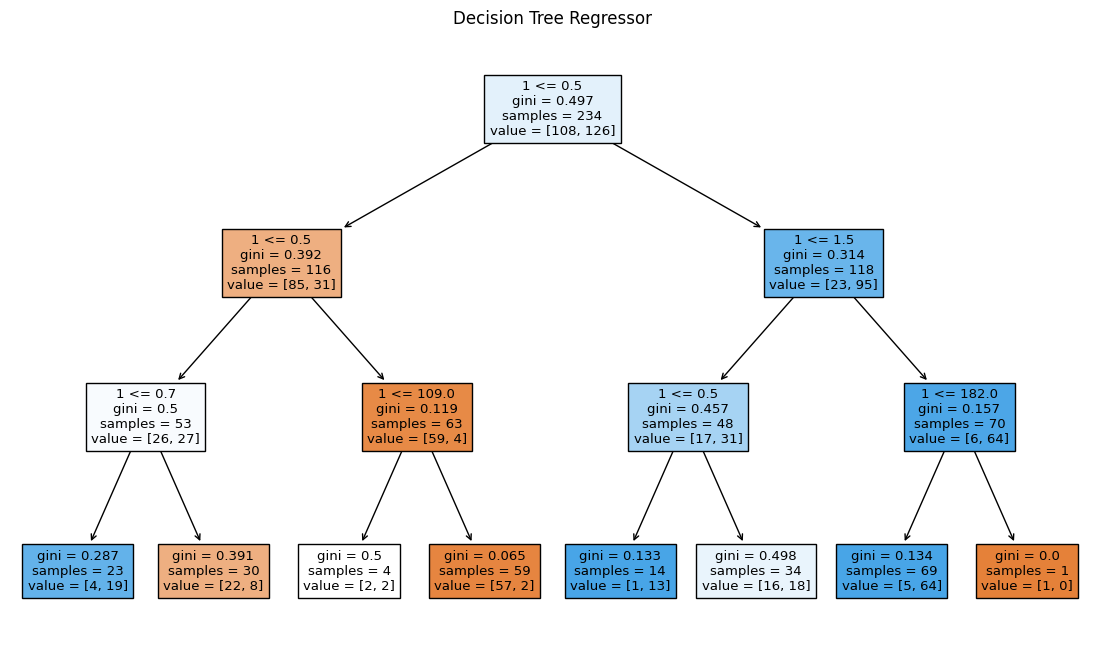

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plot_tree(dt_classifier, filled=True, feature_names=y)
plt.title("Decision Tree Regressor")
plt.show()
